<a href="https://colab.research.google.com/github/gautam-pai/Image-Classification-CIFAR10-Dataset/blob/main/CIFAR10_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets,transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader

## Import Datasets

In [3]:
train_data=datasets.CIFAR10(root="./data",train=True,transform=transforms.ToTensor(),download=True)
test_data=datasets.CIFAR10(root="./data",train=False,transform=transforms.ToTensor(),download=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
class_names = train_data.classes

## Data Exploration

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'frog')

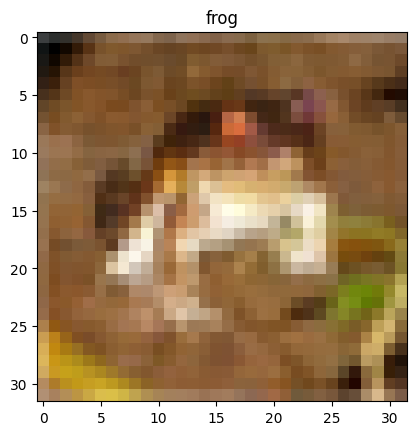

In [7]:
print(train_data[0][0].shape)
sample_image=train_data[0][0]
sample_tag=train_data[0][1]
sample_image=sample_image.permute(1,2,0)
plt.imshow(sample_image)
plt.title(class_names[sample_tag])

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'ship')

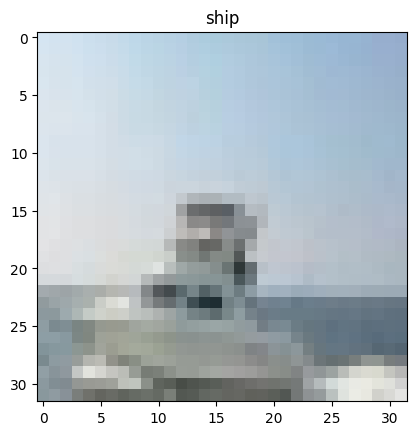

In [8]:
print(train_data[100][0].shape)
sample_image=train_data[100][0]
sample_tag=train_data[100][1]
sample_image=sample_image.permute(1,2,0)
plt.imshow(sample_image)
plt.title(class_names[sample_tag])

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'dog')

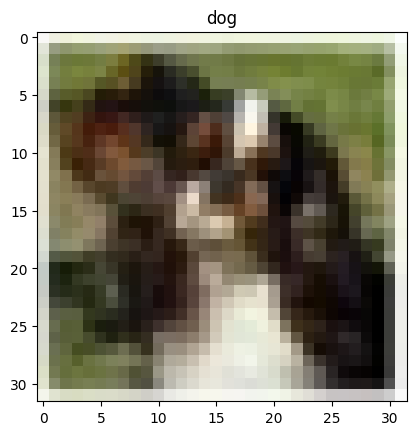

In [9]:
print(train_data[500][0].shape)
sample_image=train_data[500][0]
sample_tag=train_data[500][1]
sample_image=sample_image.permute(1,2,0)
plt.imshow(sample_image)
plt.title(class_names[sample_tag])

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'frog')

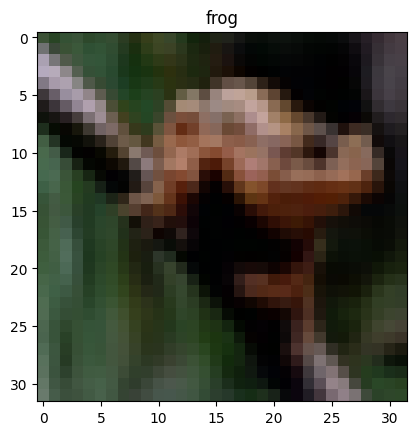

In [10]:
print(train_data[5000][0].shape)
sample_image=train_data[5000][0]
sample_tag=train_data[5000][1]
sample_image=sample_image.permute(1,2,0)
plt.imshow(sample_image)
plt.title(class_names[sample_tag])

## Creating batches of datasets

In [11]:
## Creating a small batch size of 10
train_loader=DataLoader(train_data,batch_size=10,shuffle=False)
test_loader=DataLoader(test_data,batch_size=10, shuffle=False)

## Defining the CNN Model

In [12]:
class Cifar10Model(nn.Module):
  def __init__(self):
    super().__init__()
    ## Conv Layers
    self.conv1=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1)
    self.conv2=nn.Conv2d(in_channels=10,out_channels=20,kernel_size=3,stride=1)
    self.conv3=nn.Conv2d(in_channels=20,out_channels=40,kernel_size=3,stride=1)

    ## Fully Connected Layers
    self.fc1=nn.Linear(2*2*40,80)
    self.fc2=nn.Linear(80,40)
    self.fc3=nn.Linear(40,10)


  def forward(self,X):
    # ReLU activation function and Max Pooling layer
    X=F.relu(self.conv1(X))
    X=F.max_pool2d(X,kernel_size=2,stride=2)
    X=F.relu(self.conv2(X))
    X=F.max_pool2d(X,kernel_size=2,stride=2)
    X=F.relu(self.conv3(X))
    X=F.max_pool2d(X,kernel_size=2,stride=2)

    # Flattening
    X=X.view(-1,2*2*40)

    ## ANN layers
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)

    # retunrn the value using log softmax function
    return X



In [13]:
Detector=Cifar10Model()

In [14]:
Detector

Cifar10Model(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=160, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=10, bias=True)
)

In [15]:
## Loss Function optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(Detector.parameters(),lr=0.001)

## Training the  model

In [16]:
# Record the training time
import time
start_time=time.time()
epochs=20
# tracking the losses & correct ones
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
losses=[]
for i in range(epochs):
  trn_corr=0
  tst_corr=0

  #training
  for b,(X_Train,y_train) in enumerate(train_loader):
    b+=1
    y_pred=Detector(X_Train)
    loss=criterion(y_pred,y_train)
    losses.append(loss)
    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum().item()
    trn_corr+=batch_corr

    #update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%500==0:
      print(f"Epochs: {i+1} Batch: {b} Loss: {loss.item()}")
  train_losses.append(loss.item())
  train_correct.append(trn_corr/len(train_data))

  # Testing

  tst_corr=0
  with torch.no_grad():
    for b,(X_Test,y_test) in enumerate(test_loader):
      y_val=Detector(X_Test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum().item()
  loss=criterion(y_val,y_test)

  test_losses.append(loss.item())
  test_correct.append(tst_corr/len(test_data))


current_time=time.time()
total=current_time-start_time

Epochs: 1 Batch: 500 Loss: 1.9508841037750244
Epochs: 1 Batch: 1000 Loss: 1.791405439376831
Epochs: 1 Batch: 1500 Loss: 2.1021728515625
Epochs: 1 Batch: 2000 Loss: 1.5981590747833252
Epochs: 1 Batch: 2500 Loss: 1.6776533126831055
Epochs: 1 Batch: 3000 Loss: 1.3347208499908447
Epochs: 1 Batch: 3500 Loss: 1.6739906072616577
Epochs: 1 Batch: 4000 Loss: 1.9614359140396118
Epochs: 1 Batch: 4500 Loss: 2.3168768882751465
Epochs: 1 Batch: 5000 Loss: 2.291081428527832
Epochs: 2 Batch: 500 Loss: 1.6031566858291626
Epochs: 2 Batch: 1000 Loss: 1.5534881353378296
Epochs: 2 Batch: 1500 Loss: 1.7195020914077759
Epochs: 2 Batch: 2000 Loss: 0.9062700271606445
Epochs: 2 Batch: 2500 Loss: 1.168890357017517
Epochs: 2 Batch: 3000 Loss: 1.1022230386734009
Epochs: 2 Batch: 3500 Loss: 1.5129282474517822
Epochs: 2 Batch: 4000 Loss: 1.5605134963989258
Epochs: 2 Batch: 4500 Loss: 1.9965612888336182
Epochs: 2 Batch: 5000 Loss: 2.3056633472442627
Epochs: 3 Batch: 500 Loss: 1.1344376802444458
Epochs: 3 Batch: 1000 

## Loss Visualization

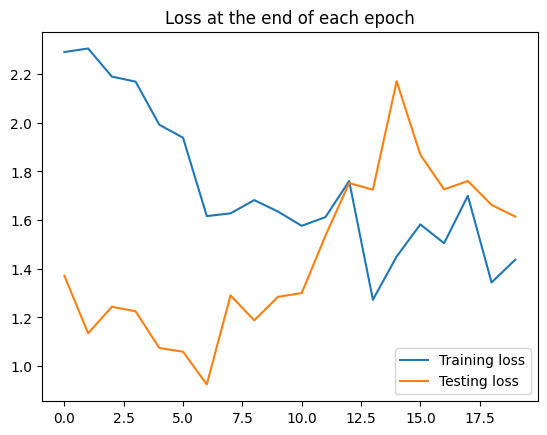

In [17]:
# Loss
plt.plot(train_losses,label="Training loss")
plt.plot(test_losses,label="Testing loss")
plt.title("Loss at the end of each epoch")
plt.legend()

## Accuracy Visualization

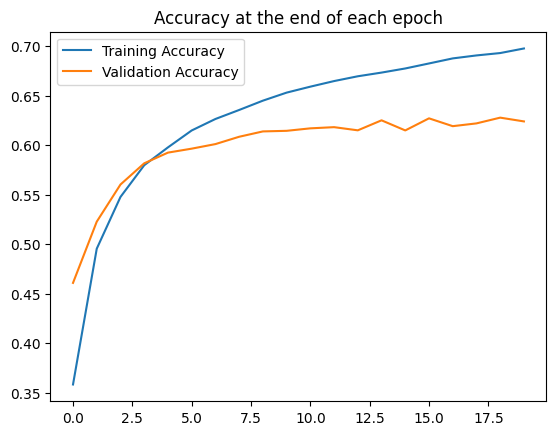

In [18]:
#graph the accuracy at the end of each epoch

plt.plot([t for t in train_correct],label="Training Accuracy")
plt.plot([t for t in test_correct],label="Validation Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

In [19]:
train_correct

[0.35836,
 0.49542,
 0.54766,
 0.57966,
 0.59768,
 0.61476,
 0.62634,
 0.63544,
 0.64484,
 0.65296,
 0.65898,
 0.66462,
 0.66946,
 0.67318,
 0.67734,
 0.6824,
 0.6875,
 0.6905,
 0.6929,
 0.69752]

In [20]:
test_correct

[0.4609,
 0.5227,
 0.5602,
 0.5816,
 0.5924,
 0.5964,
 0.601,
 0.6084,
 0.6138,
 0.6144,
 0.6169,
 0.6181,
 0.6149,
 0.625,
 0.6148,
 0.627,
 0.6191,
 0.6219,
 0.6277,
 0.6239]

In [21]:
train_losses

[2.291081428527832,
 2.3056633472442627,
 2.190086841583252,
 2.1692304611206055,
 1.9921194314956665,
 1.9386895895004272,
 1.616553544998169,
 1.6277081966400146,
 1.682273507118225,
 1.6352202892303467,
 1.5764962434768677,
 1.6123802661895752,
 1.7606213092803955,
 1.2726339101791382,
 1.4501749277114868,
 1.5823465585708618,
 1.5050774812698364,
 1.6999050378799438,
 1.3436237573623657,
 1.437511920928955]

In [22]:
test_losses

[1.3711973428726196,
 1.1347135305404663,
 1.243656039237976,
 1.2251369953155518,
 1.0742477178573608,
 1.0590004920959473,
 0.9242634773254395,
 1.2903707027435303,
 1.1879825592041016,
 1.2846697568893433,
 1.2999160289764404,
 1.5359995365142822,
 1.752379059791565,
 1.7249524593353271,
 2.1707639694213867,
 1.8686227798461914,
 1.72641921043396,
 1.7608098983764648,
 1.6623947620391846,
 1.61448073387146]

In [23]:
len(train_loader)

5000

In [24]:
len(test_loader)

1000

In [25]:

new=[t.item() for t in losses]

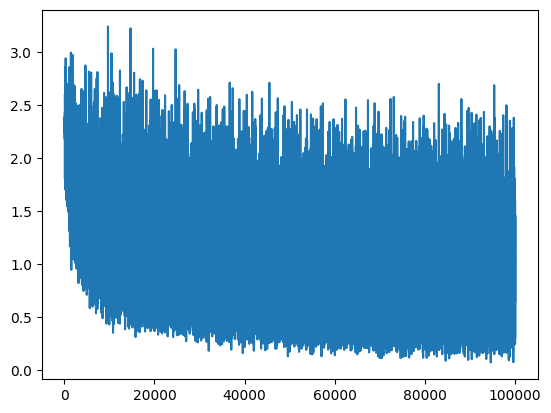

In [26]:
plt.plot(new)